In [0]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

pd.set_option('display.max_rows',500)

matplotlib.rc("font",family="NanumGothic")

In [0]:
df = pd.read_csv("member_data.csv")
df

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal
2,1000122304,정상회원,광주-기타,여,38.0,미신청,.,normal
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,.,normal
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,.,normal
...,...,...,...,...,...,...,...,...
11550,999682432,탈퇴,수지구-동천동,여,47.0,미신청,.,normal
11551,999721408,정상회원,수지구-동천동,여,43.0,미신청,.,normal
11552,999738112,정상회원,수지구-성복동,여,67.0,미신청,.,normal
11553,999754816,정상회원,수지구-상현동,여,44.0,신청,.,normal


In [0]:
pro_01 = pd.read_csv("product_data_01.csv")
pro_02 = pd.read_csv("product_data_02.csv")
pro_03 = pd.read_csv("product_data_03.csv")
pro_04 = pd.read_csv("product_data_04.csv")               

In [0]:
prodata=pd.concat([pro_01,pro_02,pro_03,pro_04])
prodata

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각
0,2018-01-02,272369856,정상회원,과실,과일,사과,사과/유(1.5kg),1.0,22207,매장C,NaN,10:04
1,2018-01-02,1476143616,정상회원,간식,빵,"식빵, 식사대용",아침빵(240g/8개)/매장,1.0,4403,매장C,NaN,10:09
2,2018-01-02,743192512,정상회원,채소,양념채소,생강,생강(300g),1.0,7083,매장C,NaN,10:12
3,2018-01-02,176912064,정상회원,축산물,유제품,우유/산양유,유기농저지방우유(종이팩/900ml),1.0,7849,매장C,NaN,10:23
4,2018-01-02,87592064,정상회원,양념/가루,가루,양념가루,카레(매운맛: 100g),3.0,15507,매장C,NaN,10:29
...,...,...,...,...,...,...,...,...,...,...,...,...
52565,2018-10-31,1110819712,정상회원,채소,뿌리채소,무,무(0.7~1kg미만),1.0,2680,매장A,NaN,13:26
52566,2018-10-31,1517953728,정상회원,채소,양념채소,쪽파,쪽파(500g),1.0,4212,매장A,NaN,10:58
52567,2018-10-31,713691392,정상회원,반찬,밑반찬,조림,우엉조림(반찬용/150g),1.0,7658,매장A,NaN,14:36
52568,2018-10-31,247926336,정상회원,간식,빵,건강곡물빵,감자바게트(180g)/매장,1.0,5169,매장A,NaN,16:23


## 회원분석

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11555 entries, 0 to 11554
Data columns (total 8 columns):
회원번호           11555 non-null int64
조합원상태          11555 non-null object
주소             11555 non-null object
성별             11553 non-null object
연령             11553 non-null float64
배송서비스신청여부      11555 non-null object
모바일알람여부        11555 non-null object
Gold_member    11555 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 722.3+ KB


In [0]:
df.isnull().sum()

회원번호           0
조합원상태          0
주소             0
성별             2
연령             2
배송서비스신청여부      0
모바일알람여부        0
Gold_member    0
dtype: int64

### 성별 

In [0]:
#성별 결측치 최빈값으로 대체
df['성별'].fillna('여', inplace=True) 
df.isna().sum()

회원번호           0
조합원상태          0
주소             0
성별             0
연령             2
배송서비스신청여부      0
모바일알람여부        0
Gold_member    0
dtype: int64

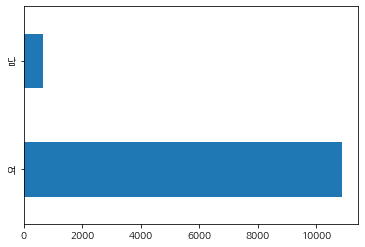

In [0]:
df_count=df['성별'].value_counts() 
df_count.plot.barh()

### 연령

In [0]:
#연령 결측치 평균 연령으로 대체
df["연령"].fillna(49.7,inplace=True)
df.isna().sum()

회원번호           0
조합원상태          0
주소             0
성별             0
연령             0
배송서비스신청여부      0
모바일알람여부        0
Gold_member    0
dtype: int64

In [0]:
df["연령"].describe()

count    11555.000000
mean        49.704232
std         11.562222
min         17.000000
25%         41.000000
50%         48.000000
75%         56.000000
max        108.000000
Name: 연령, dtype: float64

In [0]:
#연령 이상치 삭제  
df[(df["연령"]>=100)]

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member
4504,1670620864,정상회원,분당구-수내동,남,108.0,미신청,.,normal
7797,623725504,정상회원,기타-기타,여,107.0,미신청,.,normal
8823,742461248,정상회원,분당구-정자동,남,106.0,미신청,.,normal


In [0]:
df = df[(df["연령"]<100)]
df

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal
2,1000122304,정상회원,광주-기타,여,38.0,미신청,.,normal
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,.,normal
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,.,normal
...,...,...,...,...,...,...,...,...
11550,999682432,탈퇴,수지구-동천동,여,47.0,미신청,.,normal
11551,999721408,정상회원,수지구-동천동,여,43.0,미신청,.,normal
11552,999738112,정상회원,수지구-성복동,여,67.0,미신청,.,normal
11553,999754816,정상회원,수지구-상현동,여,44.0,신청,.,normal


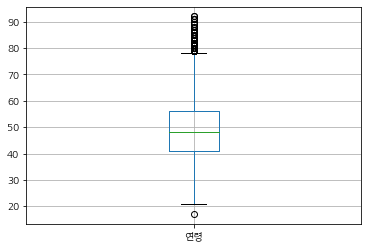

In [0]:
#100세 이상 연령 이상치 삭제 확인
df.boxplot("연령")

In [0]:
df["연령"].describe()

count    11552.000000
mean        49.689352
std         11.526782
min         17.000000
25%         41.000000
50%         48.000000
75%         56.000000
max         92.000000
Name: 연령, dtype: float64

In [0]:
df['Age_cut']=0
df['Age_cut']=pd.cut(df.연령,bins=[20,30,40,50,60,70,80,90,100],\
                         labels=[20,30,40,50,60,70,80,90])

### 조합원상태

In [0]:
df['조합원상태']=np.where(df['조합원상태']=='정상회원',1,0)

In [0]:
df['조합원상태'].value_counts() #정상회원 1, 탈퇴회원 0

1    11410
0      142
Name: 조합원상태, dtype: int64

### 주소

In [0]:
# df['주소'].value_counts()

In [0]:
df[['주소_구', '주소_동']] = df['주소'].str.split('-', n=1, expand=True)

In [0]:
# df["배송서비스신청여부"]=np.where(df["배송서비스신청여부"]=="미신청",0,1) #신청 1, 미신청 0

In [0]:
# df["모바일알람여부"]=np.where(df["모바일알람여부"]==".",0,1) #신청 1, 미신청 0

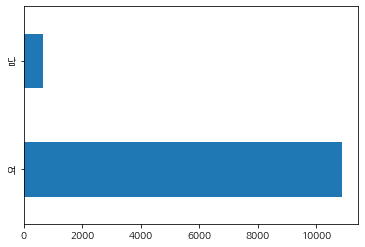

In [0]:
df_count = df["성별"].value_counts()  #여자 10,887, 남자 668
df_count.plot.barh()

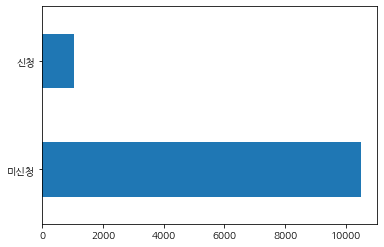

In [0]:
df_count = df["배송서비스신청여부"].value_counts()  #신청 1,043, 미신청 10,512
df_count.plot.barh()

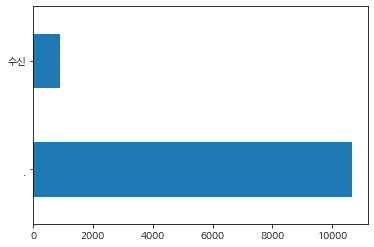

In [0]:
df_count = df["모바일알람여부"].value_counts()  #신청 902, 미신청 10,653
df_count.plot.barh()

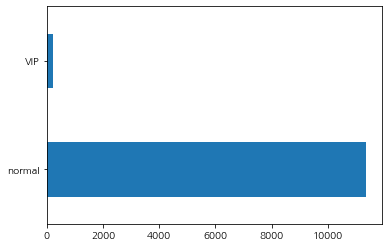

In [0]:
df_count = df["Gold_member"].value_counts()  #일반회원 11,350 , VIP 205
df_count.plot.barh()

# 구매데이터

In [0]:
prodata

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각
0,2018-01-02,272369856,정상회원,과실,과일,사과,사과/유(1.5kg),1.0,22207,매장C,NaN,10:04
1,2018-01-02,1476143616,정상회원,간식,빵,"식빵, 식사대용",아침빵(240g/8개)/매장,1.0,4403,매장C,NaN,10:09
2,2018-01-02,743192512,정상회원,채소,양념채소,생강,생강(300g),1.0,7083,매장C,NaN,10:12
3,2018-01-02,176912064,정상회원,축산물,유제품,우유/산양유,유기농저지방우유(종이팩/900ml),1.0,7849,매장C,NaN,10:23
4,2018-01-02,87592064,정상회원,양념/가루,가루,양념가루,카레(매운맛: 100g),3.0,15507,매장C,NaN,10:29
...,...,...,...,...,...,...,...,...,...,...,...,...
52565,2018-10-31,1110819712,정상회원,채소,뿌리채소,무,무(0.7~1kg미만),1.0,2680,매장A,NaN,13:26
52566,2018-10-31,1517953728,정상회원,채소,양념채소,쪽파,쪽파(500g),1.0,4212,매장A,NaN,10:58
52567,2018-10-31,713691392,정상회원,반찬,밑반찬,조림,우엉조림(반찬용/150g),1.0,7658,매장A,NaN,14:36
52568,2018-10-31,247926336,정상회원,간식,빵,건강곡물빵,감자바게트(180g)/매장,1.0,5169,매장A,NaN,16:23


In [0]:
prodata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294645 entries, 0 to 52569
Data columns (total 12 columns):
공급일자        294645 non-null object
회원번호        294645 non-null int64
조합원상태       294645 non-null object
물품대분류       294645 non-null object
물품중분류       294645 non-null object
물품소분류       294645 non-null object
물품명         294645 non-null object
구매수량        294645 non-null float64
구매금액        294645 non-null int64
구매매장        294645 non-null object
반품_원거래일자    4960 non-null float64
구매시각        294645 non-null object
dtypes: float64(2), int64(2), object(8)
memory usage: 29.2+ MB


In [0]:
prodata['연도']= prodata['공급일자'].str.split('-').str[0]
prodata['월']= prodata['공급일자'].str.split('-').str[1]
prodata['일']= prodata['공급일자'].str.split('-').str[2]

In [0]:
def print_whichday(a) :
    r = ['월', '화', '수', '목', '금', '토', '일']
    yy=int(a.split('-')[0])
    mm=int(a.split('-')[1])
    dd=int(a.split('-')[2])
    aday = datetime.date(yy, mm, dd)
    bday = aday.weekday()
    return r[bday]

prodata['요일']=prodata['공급일자'].apply(print_whichday)

In [0]:
prodata['구매_시']= prodata['구매시각'].str.split(':').str[0]

In [0]:
# def div_product(row):
#     return row.split('('')[0]

# prodata['물품'] = prodata['물품명'].apply(div_product)
# prodata['물품'].value_counts()
# prodata['물품'].value_counts().index.tolist()

In [0]:
prodata['반품_원거래일자']=prodata['반품_원거래일자'].fillna(0)

In [0]:
prodata

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각,연도,월,일,요일,구매_시
0,2018-01-02,272369856,정상회원,과실,과일,사과,사과/유(1.5kg),1.0,22207,매장C,0.0,10:04,2018,01,02,화,10
1,2018-01-02,1476143616,정상회원,간식,빵,"식빵, 식사대용",아침빵(240g/8개)/매장,1.0,4403,매장C,0.0,10:09,2018,01,02,화,10
2,2018-01-02,743192512,정상회원,채소,양념채소,생강,생강(300g),1.0,7083,매장C,0.0,10:12,2018,01,02,화,10
3,2018-01-02,176912064,정상회원,축산물,유제품,우유/산양유,유기농저지방우유(종이팩/900ml),1.0,7849,매장C,0.0,10:23,2018,01,02,화,10
4,2018-01-02,87592064,정상회원,양념/가루,가루,양념가루,카레(매운맛: 100g),3.0,15507,매장C,0.0,10:29,2018,01,02,화,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52565,2018-10-31,1110819712,정상회원,채소,뿌리채소,무,무(0.7~1kg미만),1.0,2680,매장A,0.0,13:26,2018,10,31,수,13
52566,2018-10-31,1517953728,정상회원,채소,양념채소,쪽파,쪽파(500g),1.0,4212,매장A,0.0,10:58,2018,10,31,수,10
52567,2018-10-31,713691392,정상회원,반찬,밑반찬,조림,우엉조림(반찬용/150g),1.0,7658,매장A,0.0,14:36,2018,10,31,수,14
52568,2018-10-31,247926336,정상회원,간식,빵,건강곡물빵,감자바게트(180g)/매장,1.0,5169,매장A,0.0,16:23,2018,10,31,수,16
